### Bitcoin Price Analysis
Source for data: https://min-api.cryptocompare.com/

<img src="https://thewarden.io/images/qr_code_btc.png" style="float: right;" height=150 width=150>

### If you'd like to contribute

#### **Bitcoin public address**</p>
**`bc1qlwelaz6jsupjrfpuk0327uazxrregvupse99rz`**
   
[Or use Lightning through Tippin.me](https://tippin.me/@alphaazeta)

In [76]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests

# Chart libraries + settings
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings

In [77]:
# Load Bitcoin Prices into a dataframe
# Ticker is customizable
ticker = "BTC"
# Cryptocompare URL and fiels
base_url = 'https://min-api.cryptocompare.com/data/histoday'
ticker_field = 'fsym'
field_dict = {'tsym': 'USD','allData': 'true'}
# Convert the field dict into a url encoded string
url_args = "&" + urllib.parse.urlencode(field_dict)
ticker = ticker.upper()
globalURL = (base_url + "?" + ticker_field + "=" + ticker + url_args)


In [78]:
# Request the data
resp = requests.get(url=globalURL)
data = resp.json()
data["Response"]

'Success'

In [79]:
# Parse the JSON into a Pandas DataFrame
try:
    df = pd.DataFrame.from_dict(data['Data'])
    df = df.rename(columns={'time': 'date'})
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df_save = df[['close', 'open', 'high', 'low']]
except Exception as e:
    self.errors.append(e)
    df_save = None

In [80]:
# Include percentage change and other columns 
df = df_save
df['change'] = df['close'].pct_change()

In [81]:
# Show Log chart of data

<AxesSubplot:title={'center':'Historical Chart (BTC) - Log Y axis'}, xlabel='date'>

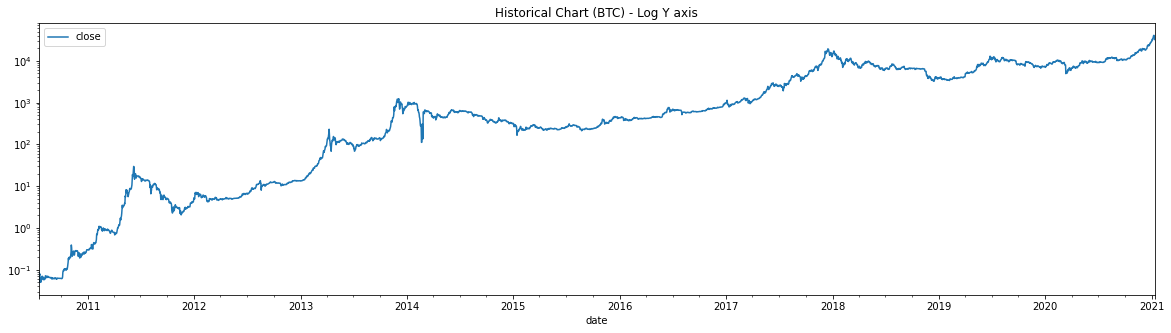

In [82]:
df[['close']].plot(kind='line', 
                   logy=True, 
                   figsize=(20,5), 
                   title='Historical Chart ('+ticker.upper()+') - Log Y axis')

In [95]:
def range_calc(days):
    # Check the range for this period between the intraday high and intraday low
    df['max_'+str(days)] = df['high'].rolling(days).max()
    df['min_'+str(days)] = df['low'].rolling(days).min()
    df['chg_'+str(days)] = (df['close'] / df['max_'+str(days)]) - 1

d = 2
range_calc(d)

In [96]:
# Latest % value for d days
last_chg = df['chg_'+str(d)][-1]
print ("Last Range = " + str(last_chg * 100) + "%")
print ("High = " +  str(df['max_'+str(d)][-1]))
print ("Low = " +  str(df['min_'+str(d)][-1]))
print ("Last = " +  str(df['close'][-1]))


Last Range = -21.876765115666064%
High = 41427.88
Low = 30308.4
Last = 32364.8


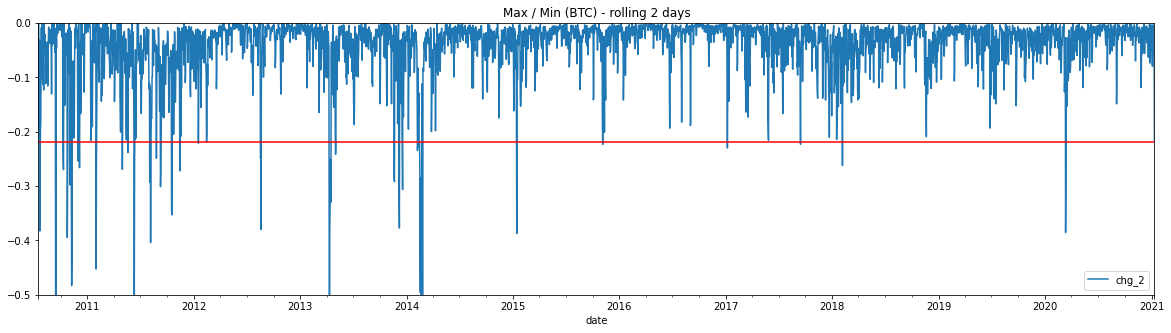

In [97]:
df[['chg_'+str(d)]].plot(
                    kind='line', 
                    figsize=(20,5), 
                    title='Max / Min ('+ticker.upper()+') - rolling '+str(d)+' days')

axes = plt.gca()
axes.set_ylim([-0.5,0])
plt.axhline(df['chg_'+str(d)][-1], color="red")
plt.show()

In [98]:
# Number of total days
total = df.count().close
total

3832

In [99]:
# How many where lower the current level?
df_lower = df.loc[df['chg_'+str(d)] < last_chg]
lower = df_lower.count().close
print ("Number of instances where the range was lower = " + str(lower))
print ("Percentage of total = " + str(lower / total * 100) + "%")

Number of instances where the range was lower = 72
Percentage of total = 1.8789144050104383%


In [100]:
# Filter the list for points that are in consecutive days
df_lower['n_days'] = df_lower.index
df_lower['diff'] = (df_lower['n_days'] - df_lower['n_days'].shift()).dt.days
df_lower = df_lower[df_lower['diff'] != 1]

<AxesSubplot:xlabel='date'>

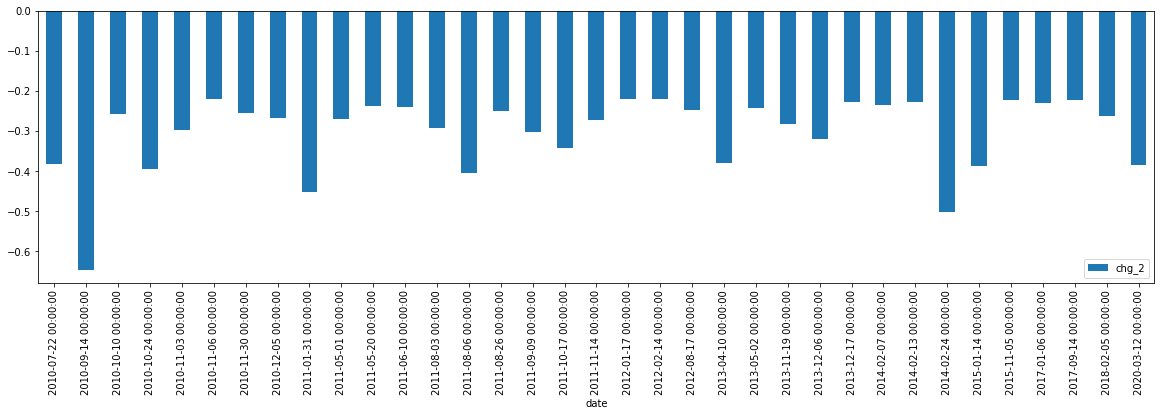

In [101]:
# Histogram of dates and returns
df_lower[['chg_'+str(d)]].plot(
                    kind='bar', 
                    figsize=(20,5))
                    

In [102]:
def find_price(date):
    try:
        price = df.loc[date]['close']
    except Exception as e:
        return None
    return (price)
    
days_list = [10, 30, 90, 365]
cols = ['close']
for element in days_list:
    df_lower['date_after_' + str(element) + '_days'] = df_lower['n_days'] + pd.DateOffset(element)
    df_lower['price_after_' + str(element) + '_days'] = df_lower['date_after_' + str(element) + '_days'].apply(find_price)
    cols.append('price_after_' + str(element) + '_days')
    df_lower['return_after_' + str(element) + '_days'] = (df_lower['price_after_' + str(element) + '_days'] / df_lower['close']) - 1
    cols.append('return_after_' + str(element) + '_days')


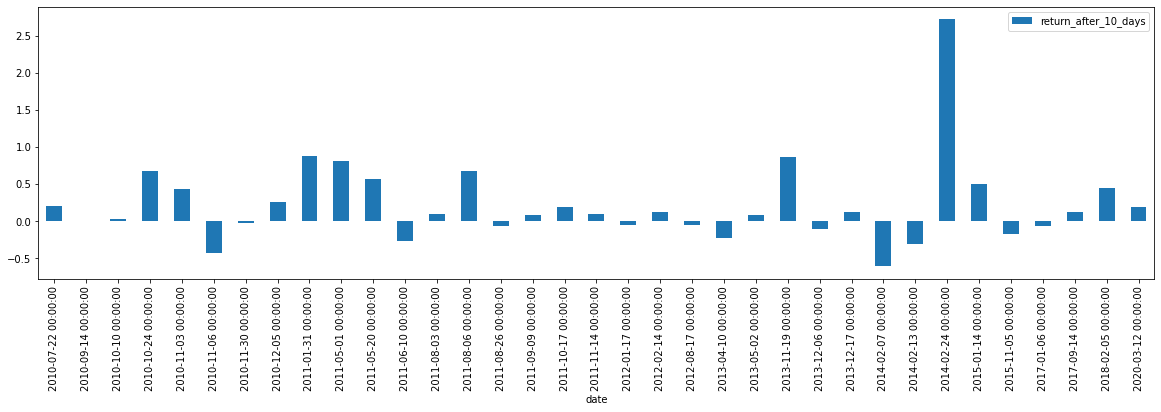

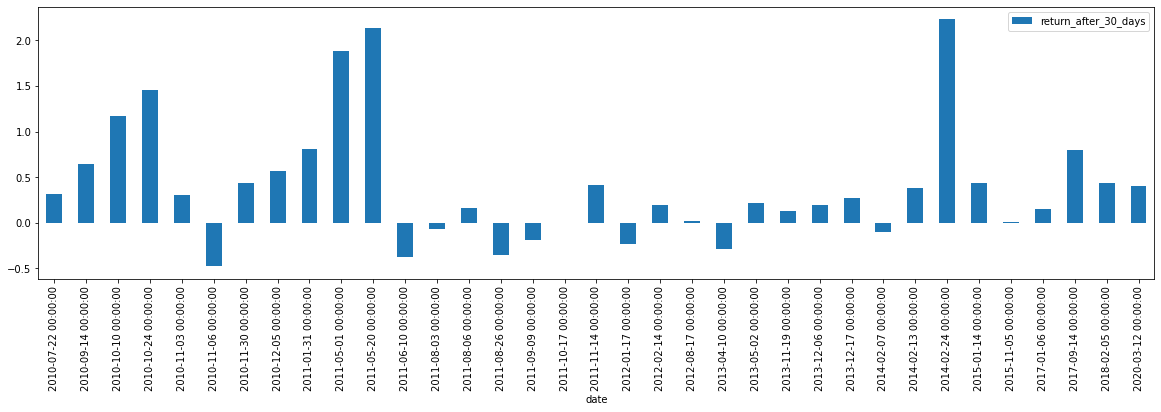

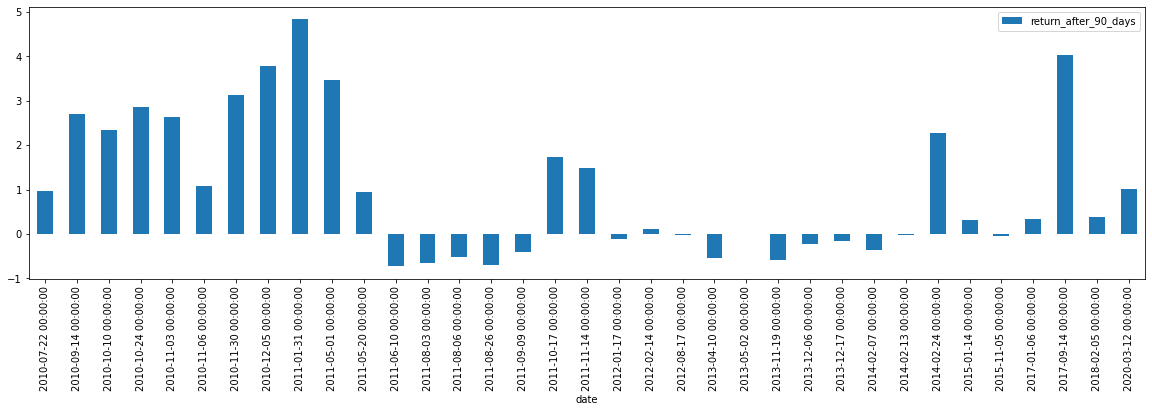

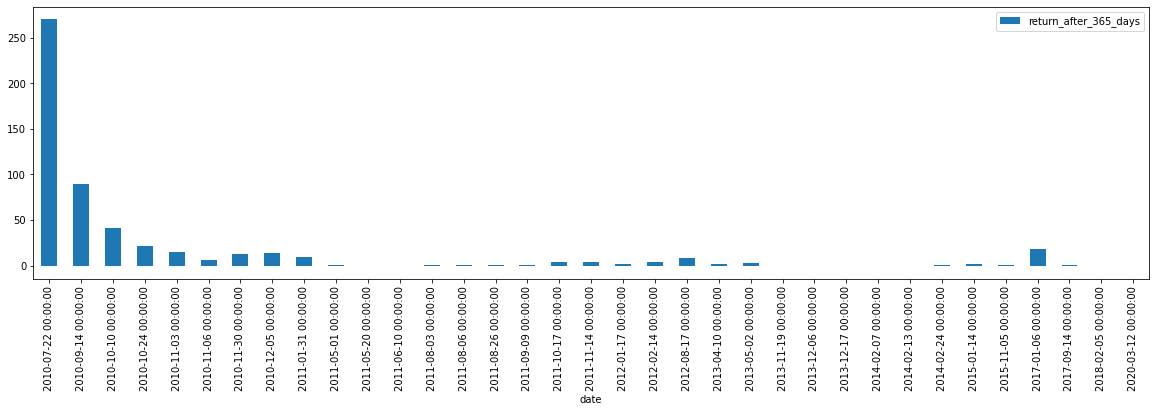

In [103]:
# Average results
for element in days_list:
    df_lower[['return_after_'+str(element)+'_days']].plot(
                    kind='bar', 
                    figsize=(20,5))


In [104]:
# Summary for each date range
for element in days_list:
    print ('-------------------------------------------------------------')
    print ('Results for ' + str(element) + ' days')
    print ('average return = ' + str(df_lower[['return_after_'+str(element)+'_days']].mean()[0] * 100) + '%')
    print ('min return = ' + str(df_lower[['return_after_'+str(element)+'_days']].min()[0] * 100) + '%')
    print ('max return = ' + str(df_lower[['return_after_'+str(element)+'_days']].max()[0] * 100) + '%')

-------------------------------------------------------------
Results for 10 days
average return = 22.325252529188237%
min return = -60.85962768633652%
max return = 272.5632183908046%
-------------------------------------------------------------
Results for 30 days
average return = 40.33241172733055%
min return = -47.6923076923077%
max return = 223.24712643678163%
-------------------------------------------------------------
Results for 90 days
average return = 100.98743643042796%
min return = -72.7348643006263%
max return = 483.2692307692307%
-------------------------------------------------------------
Results for 365 days
average return = 1557.2192426945385%
min return = -76.78496868475992%
max return = 27028.712871287127%
